In [ ]:
import numpy as np
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, auc, confusion_matrix, precision_score, recall_score, roc_curve,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount ('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
columns = ["frame","frame_length","start","apdulen","type","rx","tx",
             "type_id","causeTx","ioa","numix","oa",
             "qds","qoi","value","label"]
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/fixdataset.csv', header=None, names = columns)

In [ ]:
dataset.head(7)

,frame,frame_length,start,apdulen,type,rx,tx,type_id,causeTx,ioa,numix,oa,qds,qoi,value,label
0,1,82,68,14,0,0,0,100,6,0,1,0.0,NaN,20.0,NaN,0
1,2,82,68,14,0,0,0,100,6,0,1,0.0,NaN,20.0,NaN,0
2,3,82,68,14,0,0,0,100,6,0,1,0.0,NaN,20.0,NaN,0
3,4,82,68,14,0,0,0,100,6,0,1,0.0,NaN,20.0,NaN,0
4,5,82,68,14,0,0,0,100,6,0,1,0.0,NaN,20.0,NaN,0
5,6,84,68,16,0,1,0,11,20,1,1,0.0,241.0,NaN,12650.0,0
6,7,84,68,16,0,1,0,11,20,1,1,0.0,241.0,NaN,12644.0,0


In [ ]:
dataset.fillna(dataset.mean(), inplace = True)

In [ ]:
dataset.head(7)

,frame,frame_length,start,apdulen,type,rx,tx,type_id,causeTx,ioa,numix,oa,qds,qoi,value,label
0,1,82,68,14,0,0,0,100,6,0,1,0.0,241.0,20.0,12644.381357,0
1,2,82,68,14,0,0,0,100,6,0,1,0.0,241.0,20.0,12644.381357,0
2,3,82,68,14,0,0,0,100,6,0,1,0.0,241.0,20.0,12644.381357,0
3,4,82,68,14,0,0,0,100,6,0,1,0.0,241.0,20.0,12644.381357,0
4,5,82,68,14,0,0,0,100,6,0,1,0.0,241.0,20.0,12644.381357,0
5,6,84,68,16,0,1,0,11,20,1,1,0.0,241.0,20.0,12650.000000,0
6,7,84,68,16,0,1,0,11,20,1,1,0.0,241.0,20.0,12644.000000,0


In [ ]:
y = dataset['label']
X = dataset.drop(['label','apdulen','type','rx','tx','frame'], axis =1)

In [ ]:
X


,frame_length,start,type_id,causeTx,ioa,numix,oa,qds,qoi,value
0,82,68,100,6,0,1,0.0,241.0,20.0,12644.381357
1,82,68,100,6,0,1,0.0,241.0,20.0,12644.381357
2,82,68,100,6,0,1,0.0,241.0,20.0,12644.381357
3,82,68,100,6,0,1,0.0,241.0,20.0,12644.381357
4,82,68,100,6,0,1,0.0,241.0,20.0,12644.381357
...,...,...,...,...,...,...,...,...,...,...
44067,82,68,100,6,0,1,0.0,241.0,20.0,12644.381357
44068,100,68,11,20,1,1,0.0,241.0,20.0,14850.000000
44069,100,68,100,10,0,1,0.0,241.0,20.0,12644.381357
44070,100,68,11,20,1,1,0.0,241.0,20.0,14860.000000


0    42819
1     1253
Name: label, dtype: int64


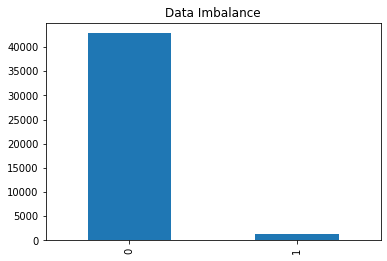

In [ ]:
target = 'label'
c = pd.DataFrame(data=y,columns=["label"])
c.label.value_counts().plot(kind='bar', title='Data Imbalance');
print(dataset[target].value_counts())

In [ ]:
X.head()

,frame_length,start,type_id,causeTx,ioa,numix,oa,qds,qoi,value
0,82,68,100,6,0,1,0.0,241.0,20.0,12644.381357
1,82,68,100,6,0,1,0.0,241.0,20.0,12644.381357
2,82,68,100,6,0,1,0.0,241.0,20.0,12644.381357
3,82,68,100,6,0,1,0.0,241.0,20.0,12644.381357
4,82,68,100,6,0,1,0.0,241.0,20.0,12644.381357


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_mm =mm.fit_transform(X)

In [ ]:
rus = RandomUnderSampler(random_state=0, sampling_strategy='auto')
X_resampled, y_resampled = rus.fit_resample (X,y)

In [ ]:
X_mm

array([[0.        , 0.        , 0.00802597, ..., 0.        , 0.        ,
        0.82811748],
       [0.        , 0.        , 0.00802597, ..., 0.        , 0.        ,
        0.82811748],
       [0.        , 0.        , 0.00802597, ..., 0.        , 0.        ,
        0.82811748],
       ...,
       [1.        , 0.        , 0.00802597, ..., 0.        , 0.        ,
        0.82811748],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.98985327],
       [1.        , 0.        , 0.00802597, ..., 0.        , 0.        ,
        0.82811748]])

In [ ]:
conv = pd.DataFrame(X_mm,columns=  ['frame_length',	'start',	'type_id','causeTX','ioa'	,'numix',	'oa'	,'qds'	,'qoi',	'value'])
conv

,frame_length,start,type_id,causeTX,ioa,numix,oa,qds,qoi,value
0,0.0,0.0,0.008026,0.000000,0.0,1.0,0.0,0.0,0.0,0.828117
1,0.0,0.0,0.008026,0.000000,0.0,1.0,0.0,0.0,0.0,0.828117
2,0.0,0.0,0.008026,0.000000,0.0,1.0,0.0,0.0,0.0,0.828117
3,0.0,0.0,0.008026,0.000000,0.0,1.0,0.0,0.0,0.0,0.828117
4,0.0,0.0,0.008026,0.000000,0.0,1.0,0.0,0.0,0.0,0.828117
...,...,...,...,...,...,...,...,...,...,...
44067,0.0,0.0,0.008026,0.000000,0.0,1.0,0.0,0.0,0.0,0.828117
44068,1.0,0.0,0.000000,0.388889,1.0,1.0,0.0,0.0,0.0,0.989123
44069,1.0,0.0,0.008026,0.111111,0.0,1.0,0.0,0.0,0.0,0.828117
44070,1.0,0.0,0.000000,0.388889,1.0,1.0,0.0,0.0,0.0,0.989853


In [ ]:
X_rus, y_rus = rus.fit_resample (X,y)

label
1        1253
0        1253
dtype: int64


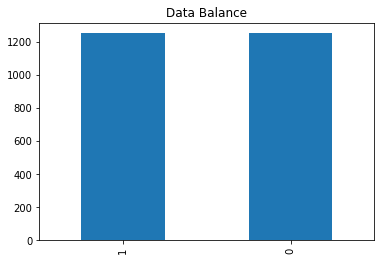

In [ ]:
c = pd.DataFrame(data=y_rus,columns=["label"])
c.label.value_counts().plot(kind='bar', title='Data Balance');
print (c.value_counts())

In [ ]:
target ='label'
tar = ['1','0']
feat = ['	frame_length',	'start',	'type_id',	'causeTX',	'ioa',	'numix','	oa'	,'qds',	'qoi','	value']
tar

['1', '0']

In [ ]:
feat

['\tframe_length',
 'start',
 'type_id',
 'causeTX',
 'ioa',
 'numix',
 '\toa',
 'qds',
 'qoi',
 '\tvalue']

**TRAIN 70% TRAIN 30%**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_rus,y_rus, test_size=0.3, random_state=21)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4,random_state=21)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=21)

In [ ]:
prediction = model.predict(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, prediction)

array([[890,   0],
       [ 46, 818]])

In [ ]:
from sklearn import metrics
print("accuracy=",metrics.accuracy_score(y_train,prediction))

accuracy= 0.9737742303306728


In [ ]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    print('Tabel Confusion Matrix Train 70%')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

Tabel Confusion Matrix Train 70%


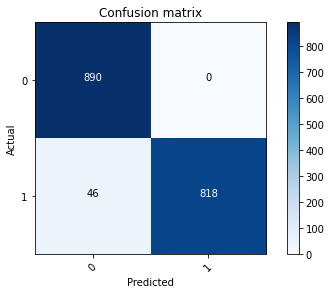

In [ ]:
cm = confusion_matrix(y_train, prediction)
plot_confusion_matrix(cm, classes = range(2))
plt.show()

In [ ]:
predictionTest = model.predict(X_test)

In [ ]:
from sklearn import metrics
print("accuracy=",metrics.accuracy_score(y_test,predictionTest))

accuracy= 0.973404255319149


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictionTest)

array([[363,   0],
       [ 20, 369]])

In [ ]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    print('Tabel Confusion Matrix Test 30%')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

Tabel Confusion Matrix Test 30%


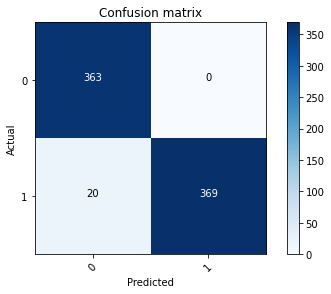

In [ ]:
cm = confusion_matrix(y_test, predictionTest)
plot_confusion_matrix(cm, classes = range(2))
plt.show()

In [ ]:
model.oob_score = model.score(X_test, y_test)
oob_error = 1 - model.oob_score
oob_error

0.02659574468085102

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, classification_report

In [ ]:
f1=f1_score(y_test, predictionTest)*100
f1

97.36147757255938

In [ ]:
TPR = 363/(363+20)*100
print(TPR)

94.7780678851175


In [ ]:
FPR = 0/(0+369)*100
print (FPR)

0.0


In [ ]:
TNR = 369/(369+0)*100
print (TNR)

100.0


In [ ]:
FNR = 20/(20+363)*100
print (FNR)

5.221932114882506


In [ ]:
prec = 363/(363+0)*100
print (prec)

100.0


**TRAIN 60% TRAIN 40%**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_rus,y_rus, test_size=0.4, random_state=21)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4,random_state=21)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=21)

In [ ]:
prediction = model.predict(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, prediction)

array([[763,   0],
       [ 36, 704]])

In [ ]:
from sklearn import metrics
print("accuracy=",metrics.accuracy_score(y_train,prediction))

accuracy= 0.9760479041916168


In [ ]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    print('Tabel Confusion Matrix Train 60%')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

Tabel Confusion Matrix Train 60%


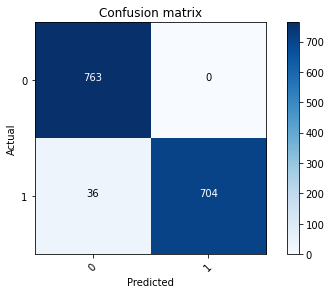

In [ ]:
cm = confusion_matrix(y_train, prediction)
plot_confusion_matrix(cm, classes = range(2))
plt.show()

In [ ]:
predictionTest = model.predict(X_test)

In [ ]:
from sklearn import metrics
print("accuracy=",metrics.accuracy_score(y_test,predictionTest))

accuracy= 0.963110667996012


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictionTest)

array([[484,   6],
       [ 31, 482]])

In [ ]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    print('Tabel Confusion Matrix Test 40%')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

Tabel Confusion Matrix Test 40%


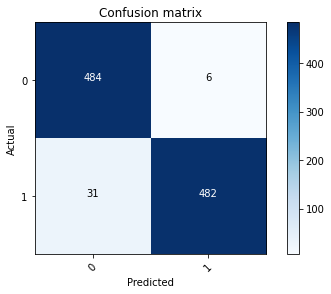

In [ ]:
cm = confusion_matrix(y_test, predictionTest)
plot_confusion_matrix(cm, classes = range(2))
plt.show()

In [ ]:
model.oob_score = model.score(X_test, y_test)
oob_error = 1 - model.oob_score
oob_error

0.03688933200398803

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, classification_report

In [ ]:
f1=f1_score(y_test, predictionTest)*100
f1

96.30369630369631

In [ ]:
TPR = 484/(484+31)*100
print(TPR)

93.98058252427185


In [ ]:
FPR = 6/(6+482)*100
print (FPR)

1.2295081967213115


In [ ]:
TNR = 482/(482+6)*100
print (TNR)

98.77049180327869


In [ ]:
FNR = 31/(31+484)*100
print (FNR)

6.019417475728155


In [ ]:
prec = 484/(484+6)*100
print (prec)

98.77551020408163


**TRAIN 80% TRAIN 20%**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_rus,y_rus, test_size=0.2, random_state=21)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4,random_state=21)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=21)

In [ ]:
prediction = model.predict(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, prediction)

array([[1013,    0],
       [  52,  939]])

In [ ]:
from sklearn import metrics
print("accuracy=",metrics.accuracy_score(y_train,prediction))

accuracy= 0.9740518962075848


In [ ]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    print('Tabel Confusion Matrix Train 80%')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

Tabel Confusion Matrix Train 80%


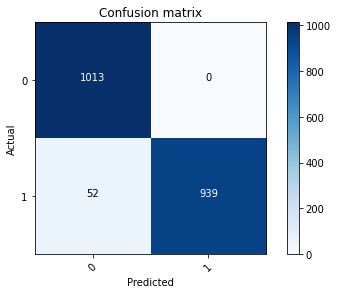

In [ ]:
cm = confusion_matrix(y_train, prediction)
plot_confusion_matrix(cm, classes = range(2))
plt.show()

In [ ]:
predictionTest = model.predict(X_test)

In [ ]:
from sklearn import metrics
print("accuracy=",metrics.accuracy_score(y_test,predictionTest))

accuracy= 0.9721115537848606


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictionTest)

array([[240,   0],
       [ 14, 248]])

In [ ]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    print('Tabel Confusion Matrix Test 20%')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

Tabel Confusion Matrix Test 20%


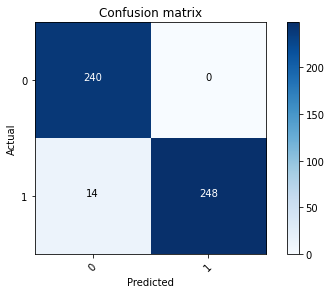

In [ ]:
cm = confusion_matrix(y_test, predictionTest)
plot_confusion_matrix(cm, classes = range(2))
plt.show()

In [ ]:
model.oob_score = model.score(X_test, y_test)
oob_error = 1 - model.oob_score
oob_error

0.027888446215139417

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, classification_report

In [ ]:
f1=f1_score(y_test, predictionTest)*100
f1

97.25490196078431

In [ ]:
TPR = 240/(240+14)*100
print(TPR)

94.48818897637796


In [ ]:
FPR = 0/(0+248)*100
print (FPR)

0.0


In [ ]:
TNR = 248/(248+0)*100
print (TNR)

100.0


In [ ]:
FNR = 14/(14+240)*100
print (FNR)

5.511811023622047


In [ ]:
prec = 240/(240+0)*100
print (prec)

100.0
